In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [4]:
#download Energy and Water Data Disclosure for Local Law 84 (2013)
APIendPoint = 'https://data.cityofnewyork.us/resource/m46j-75iy.csv' 
nrg = pd.read_csv(APIendPoint)
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,NaN,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,NaN,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,NaN,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
4,NaN,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [ ]:
#download pluto data
plutoVersion = 'mappluto_16v1.zip'
plutoURL = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/'  
os.system("wget " + plutoURL + plutoVersion)


In [5]:
#read building size from pluto shape
bsize = gpd.read_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [6]:
#change Borough Block and Lot to BBL to work as a merge key 
print nrg.columns
nrg.rename(columns={'nyc_borough_block_and_lot_bbl': 'BBL'}, inplace=True)
print nrg.columns


Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')
Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'

In [7]:
#Keep
## BBL

## site_eui_kbtu_ft2  
##  The Site Energy Use Intensity (EUI), as calculated by Portfolio Manager, at the property site. This
##equals the amount of energy consumed at the site in thousand British thermal units (kBtus) per gross square
##foot (kBtu/ft2) of the property. Site EUI values are the result of self-reported entries.

## reported_property_floor_area_building_s_ft
## Self-reported total gross square footage (ft2) of the property.


nrg['siteEUI'] = pd.to_numeric(nrg.site_eui_kbtu_ft2, errors = 'coerce')
nrg['floorArea']= pd.to_numeric(nrg.reported_property_floor_area_building_s_ft, errors = 'coerce')
nrg = nrg.copy().loc[:,['BBL','siteEUI','floorArea']]
nrg.head()


,BBL,siteEUI,floorArea
0,1.000410e+09,NaN,918919.0
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200.0
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000.0


In [8]:
#create total energy consumption variable from floorArea and siteEUI, and remove those variables
nrg['totalEnergy'] = nrg.siteEUI * nrg.floorArea
nrg.drop(['siteEUI','floorArea'], axis = 1, inplace=True)
nrg.head()

,BBL,totalEnergy
0,1.000410e+09,NaN
1,4.021460e+09,NaN
2,2.027620e+09,NaN
3,1.006700e+09,NaN
4,2.048300e+09,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f161d797a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1633f73210>]], dtype=object)

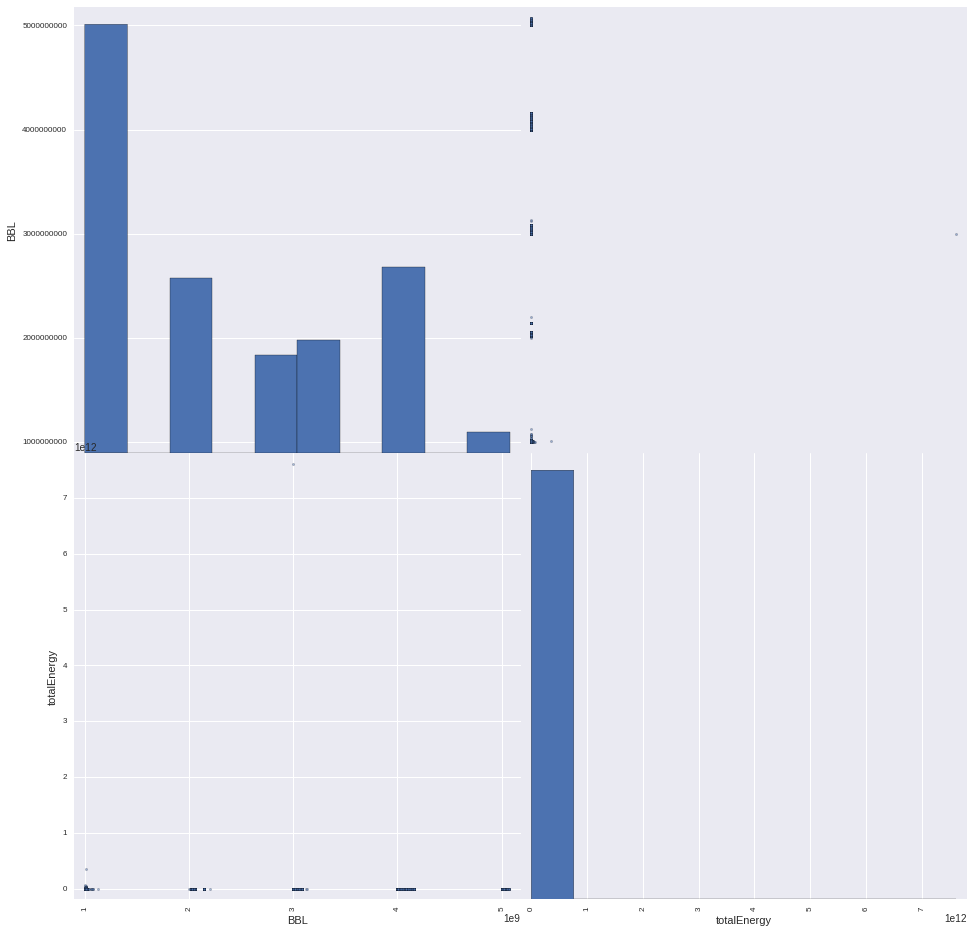

In [9]:
#Scatter plot matrix to check for numeric transformation of values 
from pandas.tools.plotting import scatter_matrix
scatter_matrix(nrg, figsize=(16, 16))

In [10]:
#Keep only the residential units in the dataset
#few units non residential could have an extraordinary energy consumption,
bsize = bsize.loc[:,['BBL','UnitsRes']]
bsize.columns = ['BBL','Units']
bsize.head()

,BBL,Units
0,1.015450e+09,16
1,1.007238e+09,50
2,1.016800e+09,10
3,1.013850e+09,29
4,1.011970e+09,26


In [11]:
#check shape before merge
print bsize.shape
print nrg.shape

(42697, 2)
(16170, 2)


In [12]:
#merge data sets by BBL keeping all rows from the energy data set
bblnrgdata = pd.merge(left = nrg, right=bsize, how = 'left', on = 'BBL')

#check shape after merge
bblnrgdata.shape

(16170, 3)

(1000, 10000000000.0)

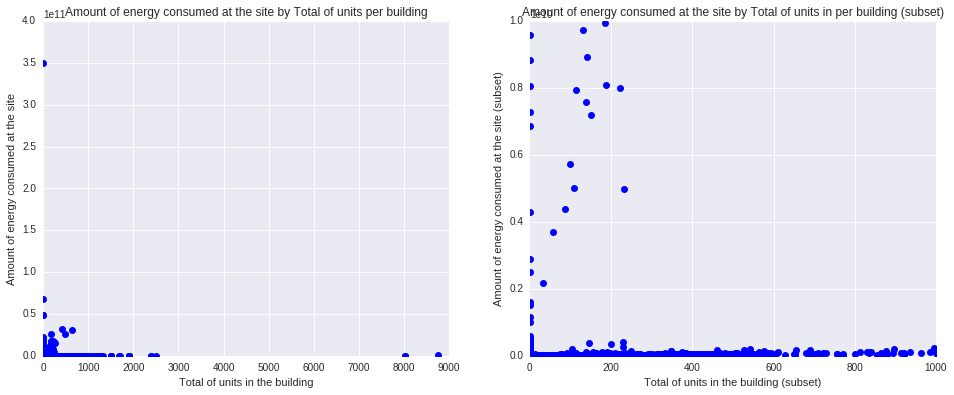

In [13]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
ax.plot(bblnrgdata.Units,bblnrgdata.totalEnergy,'bo')
ax.set_title('Amount of energy consumed at the site by Total of units per building')
ax.set_xlabel('Total of units in the building')
ax.set_ylabel('Amount of energy consumed at the site')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(bblnrgdata.Units,bblnrgdata.totalEnergy,'bo')
ax2.set_title('Amount of energy consumed at the site by Total of units in per building (subset)')
ax2.set_xlabel('Total of units in the building (subset)')
ax2.set_ylabel('Amount of energy consumed at the site (subset)')

ax2.set_xlim(1,1000)
ax2.set_ylim(1000,1e10)

## Figure 1
Scatter plot for Total units in the building vs Amount of energy consumed. In the frist plot, the full dataset gets shown, while in the second only a subset, focusing on the mayority of observations. No clear pattern appears in the data as it is

In [23]:
#rmeove NaNs for every colum
print bblnrgdata.shape
bblnrgdata.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print bblnrgdata.shape

(16170, 3)
(5069, 3)


In [24]:
#see distribution of values
print bblnrgdata.Units.describe()
print bblnrgdata.totalEnergy.describe()

count    5069.000000
mean       99.613928
std       255.911259
min         0.000000
25%         0.000000
50%        54.000000
75%       113.000000
max      8759.000000
Name: Units, dtype: float64
count    5.069000e+03
mean     2.136455e+08
std      5.245490e+09
min      0.000000e+00
25%      5.865608e+06
50%      9.347373e+06
75%      1.905119e+07
max      3.501452e+11
Name: totalEnergy, dtype: float64


In [28]:
seaborn.kdeplot?

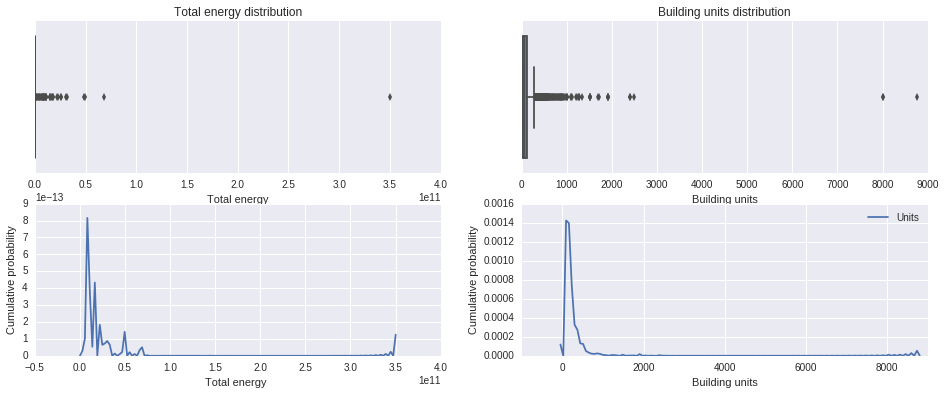

In [33]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(2,2,1)
ax = seaborn.boxplot(bblnrgdata.totalEnergy)
ax.set_title('Total energy distribution')
ax.set_xlabel('Total energy')

ax2 = fig.add_subplot(2,2,2)
ax2 = seaborn.boxplot(bblnrgdata.Units)
ax2.set_title('Building units distribution')
ax2.set_xlabel('Building units')


ax3 = fig.add_subplot(2,2,3)
ax3 = seaborn.kdeplot(bblnrgdata.totalEnergy, legend = False)
ax3.set_xlabel('Total energy ')
ax3.set_ylabel('Cumulative probability')

ax4 = fig.add_subplot(2,2,4)
ax4 = seaborn.kdeplot(bblnrgdata.Units)
ax4.set_xlabel('Building units')
ax4.set_ylabel('Cumulative probability')


## Figure 2
Boxplot and kernel desntity distirbution for Total energy and Building units, showing the presence of extreme values

In [36]:
#creating mask to remove extreme values
nrgMaskQ = (bblnrgdata.totalEnergy > 1000) & (bblnrgdata.totalEnergy < bblnrgdata.totalEnergy.quantile(.98))
unitsMaskQ = (bblnrgdata.Units > 1) & (bblnrgdata.Units < bblnrgdata.Units.quantile(.99))


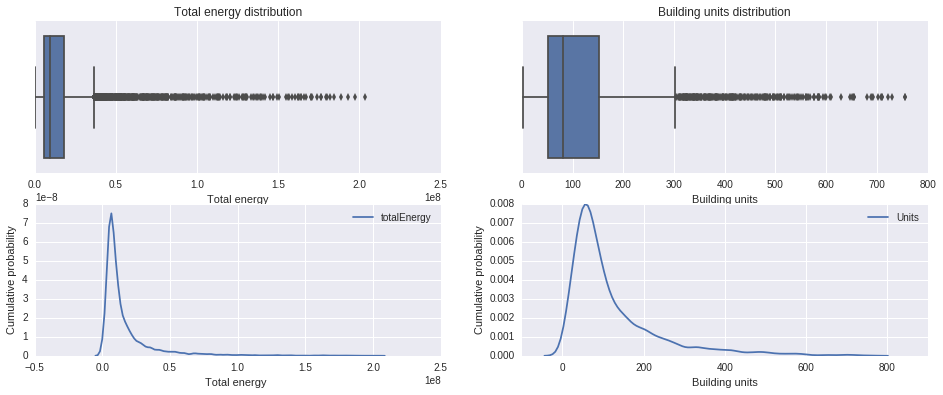

In [37]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(2,2,1)
ax = seaborn.boxplot(bblnrgdata.totalEnergy[nrgMaskQ])

ax.set_title('Total energy distribution')
ax.set_xlabel('Total energy')


ax2 = fig.add_subplot(2,2,2)
ax2 = seaborn.boxplot(bblnrgdata.Units[unitsMaskQ])
ax2.set_title('Building units distribution')
ax2.set_xlabel('Building units')

ax3 = fig.add_subplot(2,2,3)
ax3 = seaborn.kdeplot(bblnrgdata.totalEnergy[nrgMaskQ])
ax3.set_xlabel('Total energy ')
ax3.set_ylabel('Cumulative probability')

ax4 = fig.add_subplot(2,2,4)
ax4 = seaborn.kdeplot(bblnrgdata.Units[unitsMaskQ])
ax4.set_xlabel('Building units')
ax4.set_ylabel('Cumulative probability')

## Figure 3
Boxplot and kernel desntity distirbution for Total energy and Building units, with less extreme values for each of the variables.

In [38]:
#see distribution of values after outlier removal
print bblnrgdata.Units[unitsMaskQ].describe()
print bblnrgdata.totalEnergy[nrgMaskQ].describe()

count    3449.000000
mean      122.363294
std       113.904697
min         2.000000
25%        52.000000
50%        82.000000
75%       152.000000
max       756.000000
Name: Units, dtype: float64
count    4.961000e+03
mean     1.715730e+07
std      2.290942e+07
min      5.344000e+03
25%      5.822194e+06
50%      9.127547e+06
75%      1.796760e+07
max      2.034663e+08
Name: totalEnergy, dtype: float64


In [40]:
joinMasks = unitsMaskQ & nrgMaskQ
print 'Amount of observations left:', sum(joinMasks)
#plt.plot(bblnrgdata.Units[joinMasks],bblnrgdata.totalEnergy[joinMasks],'ro')

Amount of observations left: 3418


In [41]:
bblnrgdata = bblnrgdata.loc[joinMasks,:].copy()

matplotlib.figure.Figure

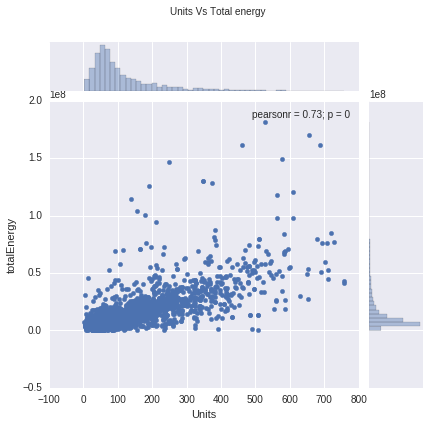

In [49]:
g = seaborn.jointplot("Units", "totalEnergy", data=bblnrgdata, kind='scatter')  
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Units Vs Total energy')


## Figure 4
Scatter plot of Units versus total energy consumption. A linear regression could be fitted, although the is still some variance in the observations with higher Total energy consumption.

In [50]:
#create log for each variable
bblnrgdata['logUnits'] = np.log10(bblnrgdata.Units)
bblnrgdata['logTotalEnergy'] = np.log10(bblnrgdata.totalEnergy)
bblnrgdata.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

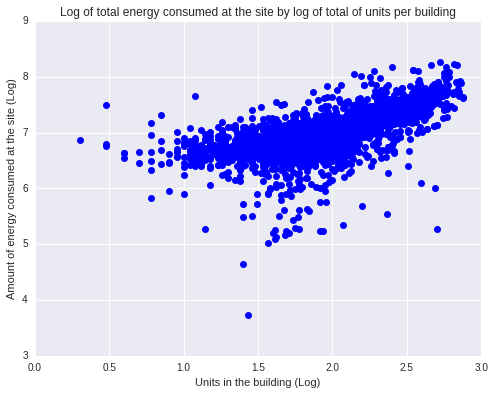

In [51]:
#Plot data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(bblnrgdata.logUnits,bblnrgdata.logTotalEnergy,'bo')
ax.set_title('Log of total energy consumed at the site by log of total of units per building')
ax.set_xlabel('Units in the building (Log)')
ax.set_ylabel('Amount of energy consumed at the site (Log)')


## Figure 5
Scatter plot of the log of Units versus the log of the total energy consumption. A linear regression could be fitted, in a seemingly better fashion than in the case of **Figure 4**.

## 1. Fit a line to Units vs Energy.

In [53]:
#test for units as independent
x = sm.add_constant(bblnrgdata.logUnits)
y = bblnrgdata.logTotalEnergy
lmUvE = sm.OLS(y,x,missing='drop').fit()
print lmUvE.summary()

                            OLS Regression Results                            
Dep. Variable:         logTotalEnergy   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     2482.
Date:                Mon, 17 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:26:22   Log-Likelihood:                -546.08
No. Observations:                3418   AIC:                             1096.
Df Residuals:                    3416   BIC:                             1108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.6922      0.026    219.663      0.0

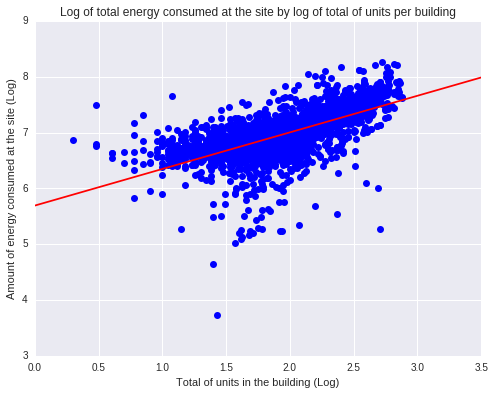

In [54]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(bblnrgdata.logUnits,bblnrgdata.logTotalEnergy,'bo')
ax.plot([0,3.5],[lmUvE.params[0],lmUvE.params[0] + 3.5 * lmUvE.params[1]],'r')
ax.set_title('Log of total energy consumed at the site by log of total of units per building')
ax.set_xlabel('Total of units in the building (Log)')
ax.set_ylabel('Amount of energy consumed at the site (Log)')


## Figure 6
Scatter plot of the log of Units versus the log of the total energy consumption with a fitted linear regression.

## 2. Fit a line to  Energy vs Units.

In [55]:
#test for energy as independent
x = sm.add_constant(bblnrgdata.logTotalEnergy)
y = bblnrgdata.logUnits
lmEvU = sm.OLS(y,x,missing='drop').fit()
print lmEvU.summary()

                            OLS Regression Results                            
Dep. Variable:               logUnits   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     2482.
Date:                Mon, 17 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:27:32   Log-Likelihood:                -507.64
No. Observations:                3418   AIC:                             1019.
Df Residuals:                    3416   BIC:                             1032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             -2.5316      0.090    -28.

(0, 4)

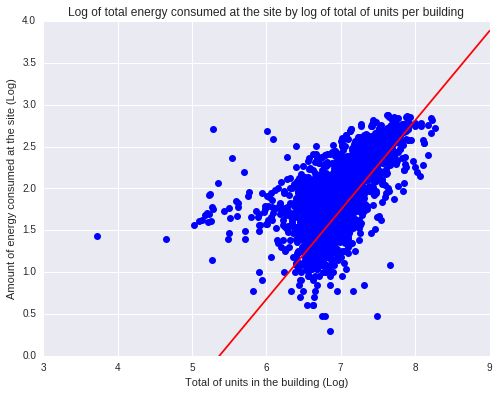

In [56]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(bblnrgdata.logTotalEnergy,bblnrgdata.logUnits,'bo')
ax.plot([3,9],[lmEvU.params[0],lmEvU.params[0] + 10 * lmEvU.params[1]],'r')
ax.set_title('Log of total energy consumed at the site by log of total of units per building')
ax.set_xlabel('Total of units in the building (Log)')
ax.set_ylabel('Amount of energy consumed at the site (Log)')
ax.set_ylim(0,4)


## Figure 7
Scatter plot of the log of the total energy consumption versus the log of Units with a fitted linear regression.

## Evaluate which is better by calculating the chi square.

In [58]:
unitsVsEnergy = bblnrgdata.copy()

unitsVsEnergy['fitValue'] = lmUvE.predict(sm.add_constant(bblnrgdata.logUnits))
unitsVsEnergy['epsilon2'] = (unitsVsEnergy.fitValue - unitsVsEnergy.logTotalEnergy) ** 2
#square root and then make the square of logUnits is the same as logUnits 
unitsVsEnergy['error'] = bblnrgdata.logUnits 
unitsVsEnergy.describe()

,BBL,totalEnergy,Units,logUnits,logTotalEnergy,fitValue,epsilon2,error
count,3.418000e+03,3.418000e+03,3418.000000,3418.000000,3418.000000,3418.000000,3.418000e+03,3418.000000
mean,1.013189e+09,1.316315e+07,121.608836,1.932931,6.960267,6.960267,8.059297e-02,1.932931
std,5.538744e+06,1.477503e+07,113.395749,0.368902,0.373075,0.242009,2.919531e-01,0.368902
min,1.000078e+09,5.344000e+03,2.000000,0.301030,3.727866,5.889700,2.555657e-10,0.301030
25%,1.009158e+09,5.649073e+06,51.000000,1.707570,6.751977,6.812425,3.810527e-03,1.707570
50%,1.013690e+09,8.339442e+06,82.000000,1.913814,6.921137,6.947725,1.672711e-02,1.913814
75%,1.017178e+09,1.470695e+07,150.750000,2.178256,7.167523,7.121206,5.690346e-02,2.178256
max,1.022500e+09,1.820804e+08,756.000000,2.878522,8.260263,7.580597,8.429499e+00,2.878522


In [59]:
#chi square statistic
unitsVsEnergyChi2 = sum(unitsVsEnergy.epsilon2/unitsVsEnergy.error)
print 'Units Vs Energy Chi Squared:', unitsVsEnergyChi2

Units Vs Energy Chi Squared: 163.712659174


In [61]:
EnergyVsUnits = bblnrgdata.copy()
EnergyVsUnits['fitValue'] = lmEvU.predict(sm.add_constant(bblnrgdata.logTotalEnergy))
EnergyVsUnits['epsilon2'] = (EnergyVsUnits.fitValue - EnergyVsUnits.logUnits) ** 2
#square root and then make the square of logUnits is the same as logUnits 
unitsVsEnergy['error'] = bblnrgdata.logTotalEnergy  
EnergyVsUnits.describe()    

,BBL,totalEnergy,Units,logUnits,logTotalEnergy,fitValue,epsilon2
count,3.418000e+03,3.418000e+03,3418.000000,3418.000000,3418.000000,3418.000000,3.418000e+03
mean,1.013189e+09,1.316315e+07,121.608836,1.932931,6.960267,1.932931,7.880023e-02
std,5.538744e+06,1.477503e+07,113.395749,0.368902,0.373075,0.239302,1.843891e-01
min,1.000078e+09,5.344000e+03,2.000000,0.301030,3.727866,-0.140432,3.923631e-08
25%,1.009158e+09,5.649073e+06,51.000000,1.707570,6.751977,1.799327,4.999288e-03
50%,1.013690e+09,8.339442e+06,82.000000,1.913814,6.921137,1.907832,2.505868e-02
75%,1.017178e+09,1.470695e+07,150.750000,2.178256,7.167523,2.065871,7.426718e-02
max,1.022500e+09,1.820804e+08,756.000000,2.878522,8.260263,2.766789,3.421173e+00


In [62]:
EnergyVsUnitsChi2 = sum(EnergyVsUnits.epsilon2/unitsVsEnergy.error)
print 'Energy Vs Units Chi Squared:', EnergyVsUnitsChi2

Energy Vs Units Chi Squared: 40.4148236236


Chi square statistic tells how well a model explains data including uncertainties, in a way that the bigger are the uncertainties the smaller the Chi Squared. Therefore, in this situation, the **Units Vs Energy** model performs better and carries a bigger Chi Square.

## Polynomial 

In [63]:
#create an x squared and a model fitting this specification
bblnrgdata['logUnits2'] = bblnrgdata.logUnits * bblnrgdata.logUnits
lmPol = smf.ols(formula = 'logTotalEnergy ~ logUnits + logUnits2', data = bblnrgdata).fit()
print lmPol.summary()

                            OLS Regression Results                            
Dep. Variable:         logTotalEnergy   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     1560.
Date:                Mon, 17 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:29:46   Log-Likelihood:                -370.36
No. Observations:                3418   AIC:                             746.7
Df Residuals:                    3415   BIC:                             765.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.1808      0.081     88.404      0.0

In [64]:
#creating a function for the fitted model line and a new vector of values

def lmPolFited (x):
    return lmPol.params[0] + x * lmPol.params[1] + (x**2) * lmPol.params[2]

xNew = np.linspace(0,3.5, 100)

y_fit = map(lmPolFited,xNew)


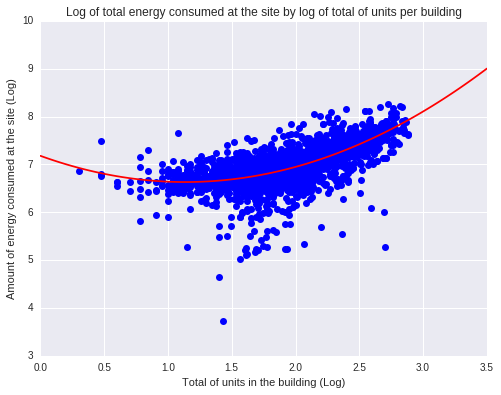

In [66]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(bblnrgdata.logUnits,bblnrgdata.logTotalEnergy,'bo')

ax.plot(xNew,y_fit,'r-')

ax.set_title('Log of total energy consumed at the site by log of total of units per building')
ax.set_xlabel('Total of units in the building (Log)')
ax.set_ylabel('Amount of energy consumed at the site (Log)')


## Figure 8
Scatter plot of the log of the total energy consumption versus the log of Units with a fitted regression using the polynomial specification. Graphically it appears to be a better fit.

### Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test

In [80]:
#models
logLikelihood_Model1 = lmUvE.llf #fewer parameters
logLikelihood_Model2 = lmPol.llf
LR = -2 * (logLikelihood_Model1 - logLikelihood_Model2)
print LR

351.435200269


Given that the Chi Square for a confidence level of 95% (or $\alpha = 0.5$) and 1 degrees  of freedom is 3.84, the obtained statistic is beyond the critical value of rejection of the null hypothesis (this being that the restricted model is correct). Therefore, the polynomial specification is the proper model for this situation. This is confirmed by the method *compare_lr_test()* within the library **statsmodel**

In [82]:
lmPol.compare_lr_test(lmUvE)

(351.43520026927035, 2.0635082817612445e-78, 1.0)

The p-value is lower than $\alpha$  (0.5)